# Introduction

> In this Blog, we are going to discuss about the TF-IDF vectorizer from the Natural Language Processing.



# What is TF-IDF?
> **TF-IDF (term frequency-inverse document frequency)** is a statistical measure that evaluates how relevant a word is to a document in a collection of documents.

> This is done by multiplying two metrics: how many times a word appears in a document, and the inverse document frequency of the word across a set of documents.

> It has many uses, most importantly in automated text analysis, and is very useful for scoring words in machine learning algorithms for Natural Language Processing (NLP).

> TF-IDF was invented for document search and information retrieval. It works by increasing proportionally to the number of times a word appears in a document, but is offset by the number of documents that contain the word. So, words that are common in every document, such as this, what, and if, rank low even though they may appear many times, since they don’t mean much to that document in particular.


# How is TF-IDF calculated?
> The **Term Frequency** of a word in a document. There are several ways of calculating this frequency, with the simplest being a raw count of instances a word appears in a document. Then, there are ways to adjust the frequency, by length of a document, or by the raw frequency of the most frequent word in a document.

> The **Inverse Document Frequency** of the word across a set of documents. This means, how common or rare a word is in the entire document set. The closer it is to 0, the more common a word is. This metric can be calculated by taking the total number of documents, dividing it by the number of documents that contain a word, and calculating the logarithm.

> So, if the word is very common and appears in many documents, this number will approach 0. Otherwise, it will approach 1.

> Multiplying these two numbers results in the **TF-IDF** score of a word in a document. The higher the score, the more relevant that word is in that particular document.

Now, Let's go to the practical implementation of TF-IDF

- toc: true
- badges: true
- comments: true
- categories: [ nlp, tfidf, scikit-learn ]

# Let's See Examples

## Importing Modules
> Here we import all the necessary modules that are required later.

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


 Warnings
> This will hide all the warnings in the output screen.

In [96]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

Generate `requirements.txt` file
> This will generate all the requirements dependencies from the import modules.

In [97]:
!pipreqs ./ --ignore .venv --force

/bin/bash: pipreqs: command not found


## Mounting Google Drive

In [98]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Fetching the Data

In [99]:
df = pd.read_excel("/content/drive/MyDrive/Digital Data.xlsx")


In [100]:
df["TitleandDesc"] = df["title"] + df["Job_Description"]

## Manipulation of Data

In [101]:
# df

In [102]:
df["TitleandDesc"]

0       Commercial Painters needed ASAP at our Dallas/...
1       Nightclub Jobs -Model/Servers- Cash Daily,Look...
2       Nightclub Jobs -Model Servers- Cash Daily,* Mo...
3       PRINTING - 1st shift,CDL Class A full time loc...
4       Admin Assistant,Necesito personal de limpieza ...
                              ...                        
2109    Calling all well connected engineers, develope...
2110    Software Engineer - Remote OptionalSignup on H...
2111    Senior Software Engineer for Part-time Technic...
2112    Google AppSheet Developer | $47.00 - $54.00 pe...
2113    Graphic Designer Production mgr.Sign Design is...
Name: TitleandDesc, Length: 2114, dtype: object

## Removing Unnecessary Data
> Here, we remove the columns that are not required for the EDA.

In [103]:
df
df.drop(['Index', 'title','url','Posted-Date', 'Job_Description'], axis=1, inplace=True)

In [104]:
# df

In [105]:
first_column = df.pop('TitleandDesc')
df.insert(0, 'TitleandDesc', first_column)

In [106]:
df.shape

(2114, 2)

In [107]:
total = df['TitleandDesc'].notnull().sum()
round((total/len(df)*100),1)

100.0

In [108]:
# df.head(15)

In [109]:
pd.DataFrame(df.JobType.unique()).values

array([['Jobs – Retail'],
       ['Jobs – IT'],
       ['Rent – Apartment'],
       ['Sell – House'],
       ['Banking']], dtype=object)

In [110]:
df['Job_Id'] = df['JobType'].factorize()[0]
job_id_df = df[['JobType', 'Job_Id']].drop_duplicates()


# Dictionaries for future use
job_to_id = dict(job_id_df.values)
id_to_job = dict(job_id_df[['Job_Id', 'JobType']].values)

# New dataframe
df

,TitleandDesc,JobType,Job_Id
0,Commercial Painters needed ASAP at our Dallas/...,Jobs – Retail,0
1,"Nightclub Jobs -Model/Servers- Cash Daily,Look...",Jobs – Retail,0
2,"Nightclub Jobs -Model Servers- Cash Daily,* Mo...",Jobs – Retail,0
3,"PRINTING - 1st shift,CDL Class A full time loc...",Jobs – IT,1
4,"Admin Assistant,Necesito personal de limpieza ...",Jobs – IT,1
...,...,...,...
2109,"Calling all well connected engineers, develope...",Jobs – IT,1
2110,Software Engineer - Remote OptionalSignup on H...,Jobs – IT,1
2111,Senior Software Engineer for Part-time Technic...,Jobs – IT,1
2112,Google AppSheet Developer | $47.00 - $54.00 pe...,Jobs – IT,1


Check
> Here, we check the position of the cells in the datasets, where the cell is empty.

In [111]:
np.where(pd.isnull(df))

(array([], dtype=int64), array([], dtype=int64))

In [112]:
df.isnull().sum()

TitleandDesc    0
JobType         0
Job_Id          0
dtype: int64

## Graph Plot

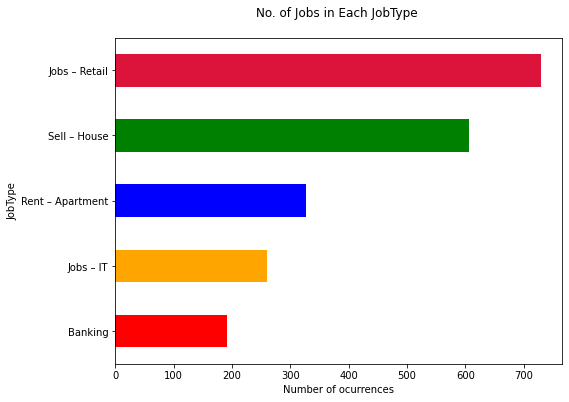

In [113]:
fig = plt.figure(figsize=(8,6))
colors = ['red', 'orange', 'blue', 'green', 'crimson']
df.groupby('JobType').TitleandDesc.count().sort_values().plot.barh(
    ylim=0, color=colors, title= 'No. of Jobs in Each JobType \n')
plt.xlabel('Number of ocurrences', fontsize = 10);

## Count
> We count the total occurences of data in the datasets.

In [114]:
from collections import Counter
Counter(df["JobType"])

Counter({'Jobs – Retail': 729,
         'Jobs – IT': 260,
         'Rent – Apartment': 327,
         'Sell – House': 607,
         'Banking': 191})

## Performing TFIDF 

In [115]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 3), 
                        stop_words='english')

# We transform each complaint into a vector
features = tfidf.fit_transform(df.TitleandDesc).toarray()

labels = df.Job_Id

print("Each of the %d complaints is represented by %d features (TF-IDF score of unigrams and bigrams)" %(features.shape))

Each of the 2114 complaints is represented by 23401 features (TF-IDF score of unigrams and bigrams)


In [116]:
# features

In [117]:
# labels

## Generating Unigrams and Bigrams

In [118]:
N = 5
for JobType, Job_Id in sorted(job_to_id.items()):
    features_chi2 = chi2(features, labels == Job_Id)
    indices = np.argsort(features_chi2[0])
    
    feature_names = np.array(tfidf.get_feature_names())[indices]
    
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    trigrams = [v for v in feature_names if len(v.split(' ')) == 3]

    print("\n==> %s:" %(JobType))
    
    print("  * Most Correlated Unigrams are: %s" %(', '.join(unigrams[-N:])))
    print("  * Most Correlated Bigrams are: %s" %(', '.join(bigrams[-N:])))
#     print("  * Most Correlated Trigrams are: %s" %(', '.join(trigrams[-N:])))


==> Banking:
  * Most Correlated Unigrams are: accounts, quickbooks, bookkeeper, accountant, accounting
  * Most Correlated Bigrams are: accounts receivable, bookkeeper job, assistant job, senior accountant, accountant job

==> Jobs – IT:
  * Most Correlated Unigrams are: developer, pathrise, engineering, engineer, software
  * Most Correlated Bigrams are: jobs email, best matching, matching jobs, software engineering, software engineer

==> Jobs – Retail:
  * Most Correlated Unigrams are: pay, truck, cdl, driver, drivers
  * Most Correlated Bigrams are: home time, owner operators, class cdl, direct deposit, sign bonus

==> Rent – Apartment:
  * Most Correlated Unigrams are: utilities, furnished, originator, roommates, rent
  * Most Correlated Bigrams are: 2022this posting, room available, room room, roommates available, room roommates

==> Sell – House:
  * Most Correlated Unigrams are: bedroom, living, large, bedrooms, ny
  * Most Correlated Bigrams are: bedroom bathroom, brooklyn n

In [119]:
X = np.array(df["TitleandDesc"])

In [120]:
y = np.array(df["JobType"])

In [121]:
pd.DataFrame(df.JobType.unique()).values

array([['Jobs – Retail'],
       ['Jobs – IT'],
       ['Rent – Apartment'],
       ['Sell – House'],
       ['Banking']], dtype=object)

## Train Test Split

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

## OneVsRest Classifier
> One-vs-rest (OvR for short, also referred to as One-vs-All or OvA) is a heuristic method for using binary classification algorithms for multi-class classification.

> It involves splitting the multi-class dataset into multiple binary classification problems. A binary classifier is then trained on each binary classification problem and predictions are made using the model that is the most confident.

## Pipelining

In [123]:
#pipeline of feature engineering and model
model = Pipeline([('vectorizer', CountVectorizer()),
 ('tfidf', TfidfTransformer()),
 ('clf', OneVsRestClassifier(LinearSVC(class_weight='balanced')))])
#the class_weight="balanced" option tries to remove the biasedness of model towards majority sample


## Fitting the model

In [124]:
#fit model with training data
model.fit(X_train, y_train)


Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf',
                 OneVsRestClassifier(estimator=LinearSVC(class_weight='balanced')))])

## Confusion Matrix

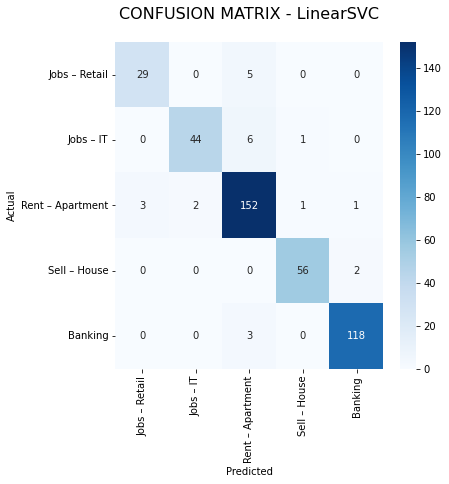

In [125]:
y_pred = model.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d',
            xticklabels=job_id_df.JobType.values, 
            yticklabels=job_id_df.JobType.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - LinearSVC\n", size=16);

## Classification report


In [126]:
print('\t\t\tCLASSIFICATIION METRICS\n')
print(classification_report(y_test, y_pred, 
                                    target_names= df['JobType'].unique()))

			CLASSIFICATIION METRICS

                  precision    recall  f1-score   support

   Jobs – Retail       0.91      0.85      0.88        34
       Jobs – IT       0.96      0.86      0.91        51
Rent – Apartment       0.92      0.96      0.94       159
    Sell – House       0.97      0.97      0.97        58
         Banking       0.98      0.98      0.98       121

        accuracy                           0.94       423
       macro avg       0.94      0.92      0.93       423
    weighted avg       0.94      0.94      0.94       423



## Save the model

In [127]:
import pickle
filename = 'model.md5'
# pickle.dump(model, open(filename, 'wb'))

## Load The Model

In [128]:
loaded_model = pickle.load(open(filename, 'rb'))

## Check Accuracy

In [129]:
result = loaded_model.score(X_test, y_test)
print(result)

0.9432624113475178


In [130]:
model.classes_

array(['Banking', 'Jobs – IT', 'Jobs – Retail', 'Rent – Apartment',
       'Sell – House'], dtype='<U16')

## Sample Input and Testing The Model

In [131]:
job = input()
model.predict([job])[0]

hi


'Sell – House'

## Analysis
> This shows that when we test the data, it gives the desired result.

> Hence, we can say that this model performs well in this set of examples.

# Conclusion
> We can say that, OneVsRest Classifier is best in cases of MultiClass Classification. In this way, we can use TF-IDF in the field of Information Retrieving as we did in this tutorials.